In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('laptops.csv',encoding="windows-1252")
df.head()
pd.pandas.set_option('display.max_columns',None)


In [3]:
df.head()


,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
##checking if there is any duplicate rows or not
df.duplicated().sum()

0

In [5]:
## checking if there are any null values or not
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
#dropping unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [9]:
## changing data type of weight column
df['Weight']=df['Weight'].apply(lambda x : float(x[:-2]))


In [10]:
df['Weight'].dtypes

dtype('float64')

In [11]:
## checking if any other type string is present in this column
df['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [12]:
x='1.37kg'
x[:-2]

'1.37'

In [13]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [14]:
## changing the data type of ram column to float type and dropping str 'gb'

df['Ram']=df['Ram'].apply(lambda x: float(x[:-2]))

In [15]:
df['Ram']

0        8.0
1        8.0
2        8.0
3       16.0
4        8.0
        ... 
1298     4.0
1299    16.0
1300     2.0
1301     6.0
1302     4.0
Name: Ram, Length: 1303, dtype: float64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


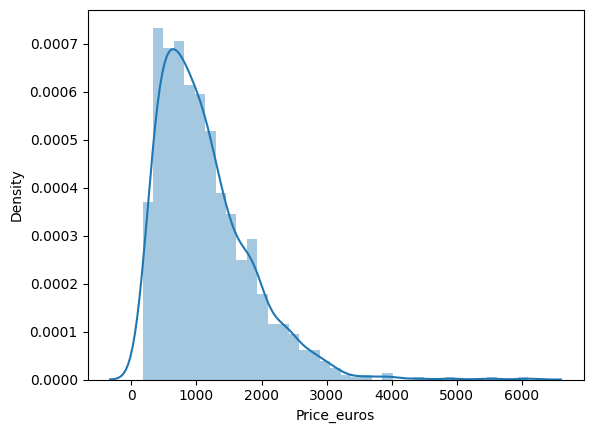

In [16]:
## univariate analysis on price column
sns.distplot(df['Price_euros'])
plt.show()

In [17]:
## this is a skewed data


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


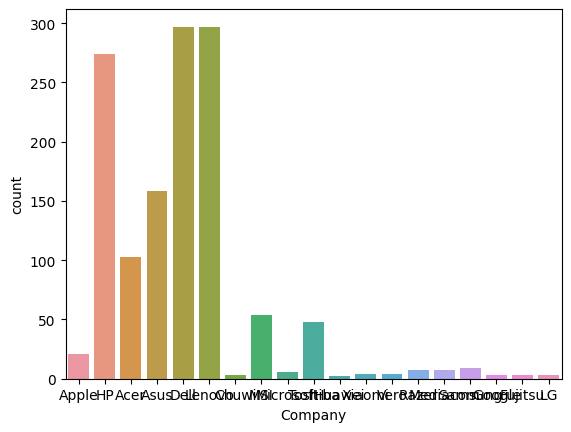

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [18]:
## lets see no of laptops of each company
sns.countplot(df['Company'])
plt.show()
plt.xticks(rotation=90)

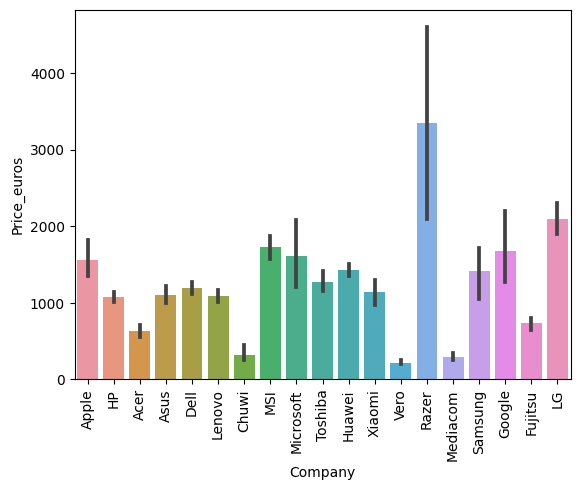

In [19]:
## lets check avg price of all company laptops
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


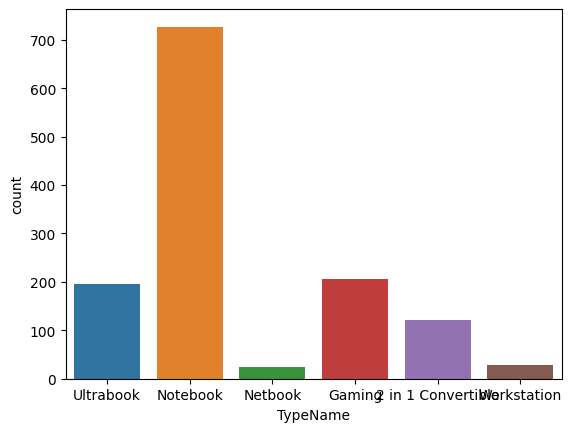

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [20]:
## lets check the type name column
sns.countplot(df['TypeName'])
plt.show()
plt.xticks(rotation=90)

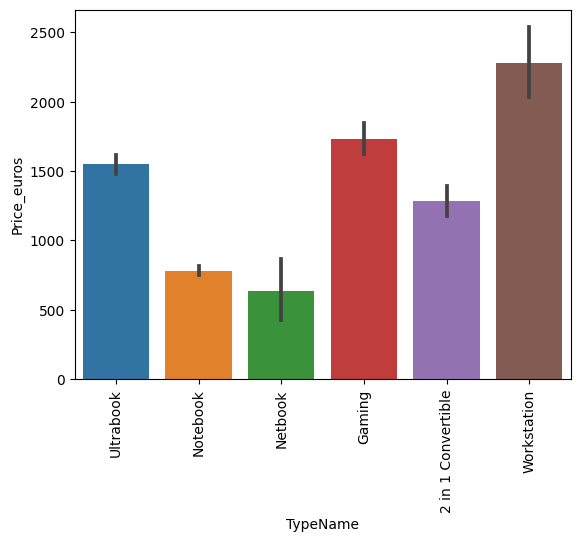

In [21]:
##lets check the avg price different types of laptops
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.show()

In [22]:
## so typename is an important column.it affects the target column.it cant be dropped

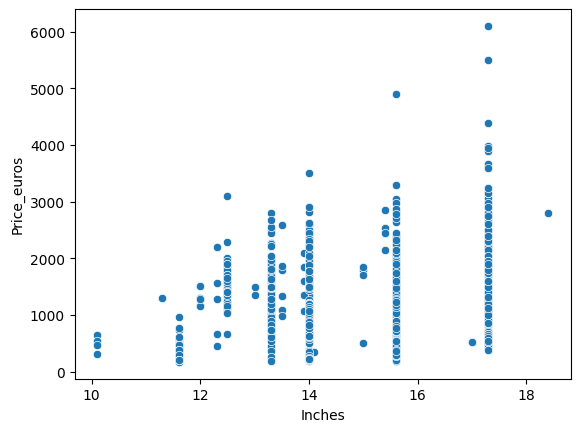

In [23]:
##lets check the relation shipof inches column with price column
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


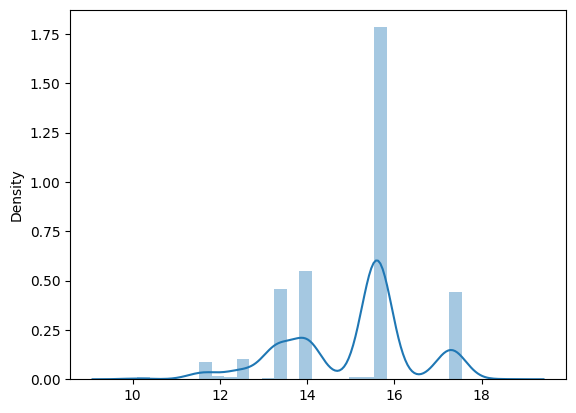

In [24]:
sns.distplot(x=df['Inches'])
plt.show()

In [25]:
#mostly bigger sizzed screens are more costly

In [26]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94


In [27]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [28]:
## here in screen resolution column i can see that a lot of information is packed in a single column
## features like touchscreen,ips,fullhd,resolution etc are quite commonly seen inthis column all together

The screen resolution is a measurement of how many pixels your screen can display horizontally and vertically. It's written in a standard way. In this example, a 1,920 x 1,080 screen displays 1,920 pixels horizontally, and 1,080 vertically.

PPI (Pixels Per Inch) refers display resolution, or, how many individual pixels are displayed in one inch of a digital image.

In [29]:
## creating a touchscreen column by appltying lambda function on screen resolution column
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


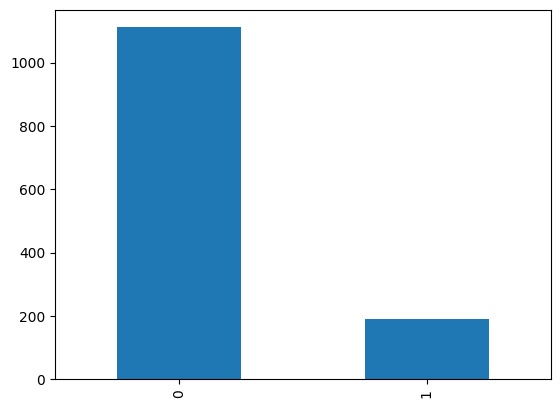

In [30]:
df['Touchscreen'].value_counts().plot.bar()
plt.show()

In [31]:
##most laptops are without any touchscreen

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


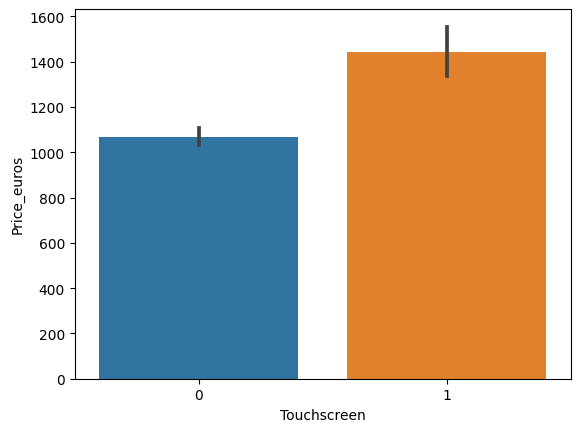

In [32]:
sns.barplot(df['Touchscreen'],df['Price_euros'])
plt.show()

In [33]:
## touchscreen laptops are costly and it is affecting our price column

In [34]:
## creating a ips column by appltying lambda function on screen resolution column
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


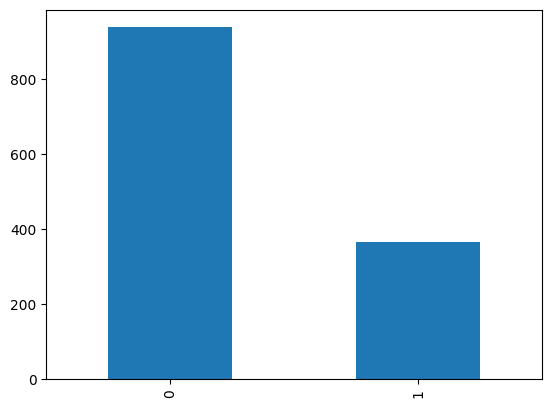

In [35]:
df['Ips'].value_counts().plot.bar()
plt.show()

In [36]:
##laptops without ips are more 

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


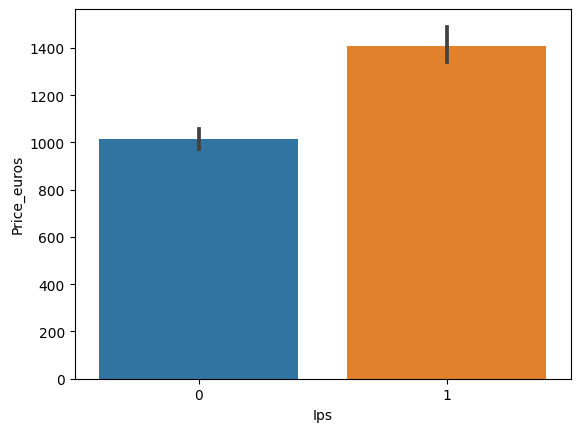

In [37]:
sns.barplot(df['Ips'],df['Price_euros'])
plt.show()

In [38]:
## laptops with ips are more costly

In [39]:
temp=df['ScreenResolution'].str.split('x',n=1,expand=True)
                                  

In [40]:
temp

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [41]:
## creating two columns in df
df['X_res']=temp[0]
df['Y_res']=temp[1]

In [42]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080


In [43]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
df['X_res'].value_counts()

Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
4K Ultra HD 3840                              7
Touchscreen 2560                              7
IPS Panel 1366                                7
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2560                 6
IPS Panel Retina Display 2304                 6
Touchscreen 2256                              6
IPS Panel Touchscreen 2560                    5
IPS Panel Retina Display 2880                 4
IPS Panel Touchscreen 1920              

In [45]:
df['X_res']=df['X_res'].apply(lambda x: int(x[-4:]))


In [46]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   float64
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory 

In [48]:
df['Y_res']=df['Y_res'].astype('int')

In [49]:
df['Y_res']

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_res, Length: 1303, dtype: int32

In [50]:
## lets checkthe correlation between the columns and target variable
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [51]:
##inches column has very less correlation with the price column, so this columns is not very usefull fr us
## we will create a new column called ppi using x-res and y-res column and check its corr with price
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5)/df['Inches'].astype('float')

In [52]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [53]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price_euros, dtype: float64

In [54]:
#so ppi column has better corr with price column

In [55]:
df['ScreenResolution'].value_counts()
## so now we extracted everything from screen resolution column. we can drop this column now


Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [56]:
df.drop('ScreenResolution',inplace=True,axis=1)

In [57]:
df.drop(['Inches','X_res','Y_res'],inplace=True,axis=1)

In [58]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [59]:
df['Cpu'].value_counts().head(50)
## here i can see that main types of cpu configuration are intel core i5,core i7,core i3
### other types are AMD and other intel core types

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i7 6820HK 2.7GHz     

In [60]:
df['Cpu_name']=df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))

In [61]:
df.head(50)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5
5,Acer,Aspire 3,Notebook,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,0,0,100.454670,AMD A9-Series 9420
6,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1,220.534624,Intel Core i7
7,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70,0,0,127.677940,Intel Core i5
8,Asus,ZenBook UX430UN,Ultrabook,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00,0,0,157.350512,Intel Core i7
9,Acer,Swift 3,Ultrabook,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00,0,1,157.350512,Intel Core i5


In [62]:
def processor_group(text):
    if text=="Intel Core i5" or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    
    elif text.split()[0]=='Intel':
        return 'Other Intel Processor'
        
    else:
        return 'AMD Processor'

In [63]:
df['Cpu_brand_name']=df['Cpu_name'].apply(processor_group)

In [64]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_name,Cpu_brand_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


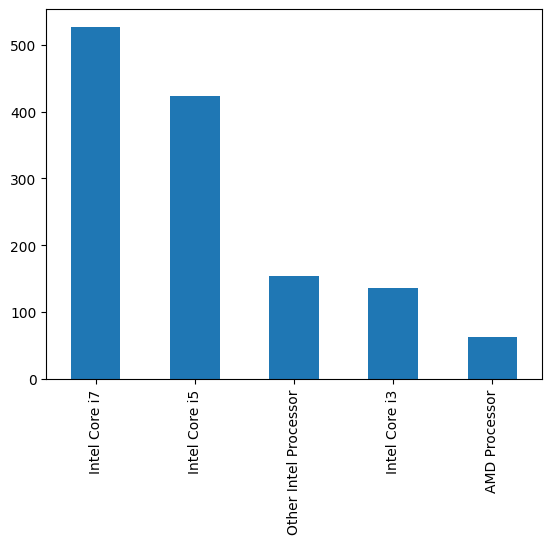

In [65]:
df['Cpu_brand_name'].value_counts().plot.bar()
plt.show()

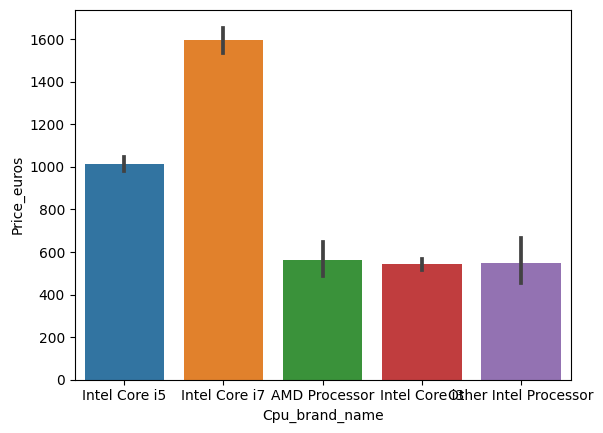

In [66]:
sns.barplot(x=df['Cpu_brand_name'],y=df['Price_euros'])
plt.show()

In [67]:
## so here we can see i7 processors are costly
## so price is dependent on cpu  type also

In [68]:
df.drop(['Cpu','Cpu_name'],axis=1,inplace=True)

In [69]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name
0,Apple,MacBook Pro,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


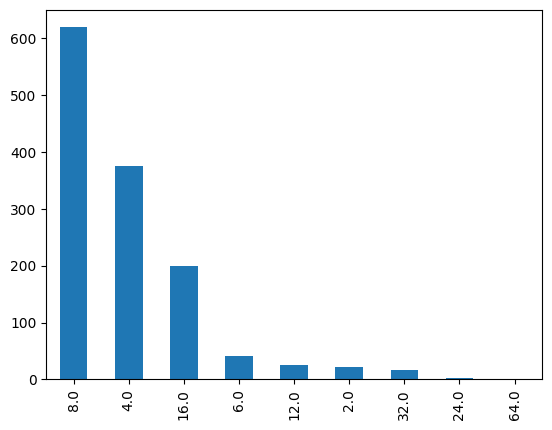

In [70]:
df['Ram'].value_counts().plot.bar()
plt.show()

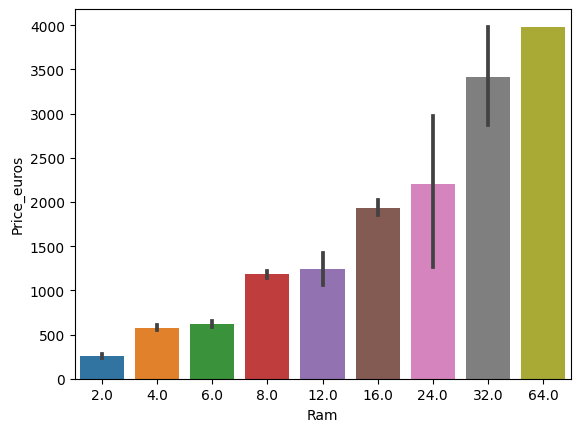

In [71]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.show()

In [72]:
## ram column is highly correlated to price column
##linear relation

In [73]:
## for memorycolumn i ll try count or frequency encoding

In [74]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name
0,Apple,MacBook Pro,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [75]:
## trying one hot encoding on top 10 ctegories and skipping the rest

In [76]:
df['Memory'].value_counts().sort_values(ascending=False).head(10).index

Index(['256GB SSD', '1TB HDD', '500GB HDD', '512GB SSD',
       '128GB SSD +  1TB HDD', '128GB SSD', '256GB SSD +  1TB HDD',
       '32GB Flash Storage', '2TB HDD', '64GB Flash Storage'],
      dtype='object')

In [77]:
memory_lst=df['Memory'].value_counts().sort_values(ascending=False).head(10).index
memory_lst=list(memory_lst)

In [78]:
memory_lst

['256GB SSD',
 '1TB HDD',
 '500GB HDD',
 '512GB SSD',
 '128GB SSD +  1TB HDD',
 '128GB SSD',
 '256GB SSD +  1TB HDD',
 '32GB Flash Storage',
 '2TB HDD',
 '64GB Flash Storage']

In [79]:
for category in memory_lst:
    df[category]=np.where(df['Memory']==category,1,0)

In [80]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,MacBook Pro,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0


In [81]:
df.corr()['Price_euros']

Ram                     0.743007
Weight                  0.210370
Price_euros             1.000000
Touchscreen             0.191226
Ips                     0.252208
ppi                     0.473487
256GB SSD               0.102866
1TB HDD                -0.292340
500GB HDD              -0.238214
512GB SSD               0.332894
128GB SSD +  1TB HDD    0.057119
128GB SSD              -0.148139
256GB SSD +  1TB HDD    0.255376
32GB Flash Storage     -0.202072
2TB HDD                -0.075793
64GB Flash Storage     -0.106259
Name: Price_euros, dtype: float64

In [82]:
### now gpu column
df['Gpu'].unique()## here gpu data is very much overwhelming and due to less domain knowledge 
##i ll try to fetch only the brand names

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [83]:
df['Gpu']=df['Gpu'].apply(lambda x : x.split()[0])

In [84]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,MacBook Pro,Ultrabook,8.0,128GB SSD,Intel,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8.0,128GB Flash Storage,Intel,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8.0,256GB SSD,Intel,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16.0,512GB SSD,AMD,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8.0,256GB SSD,Intel,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


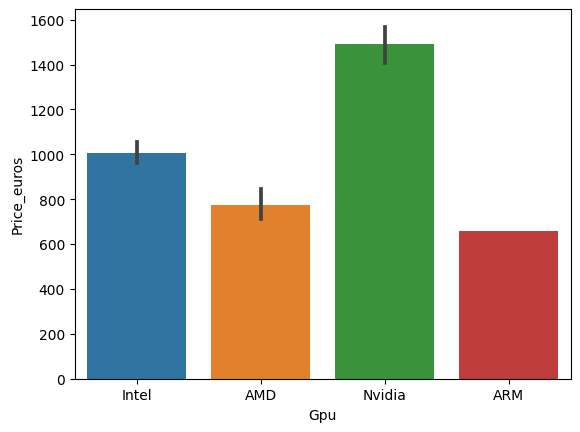

In [85]:
sns.barplot(df['Gpu'],df['Price_euros'])
plt.show()

In [86]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [87]:
###ARM is having only 1 record which not put any considrable impact ,so we will delete it
df=df[df['Gpu']!='ARM']

In [88]:
df['Gpu'].value_counts() #deletd ARM

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [89]:
df.drop('Memory',axis=1,inplace=True)

In [90]:
df.head(2)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,MacBook Pro,Ultrabook,8.0,Intel,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8.0,Intel,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0


In [91]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


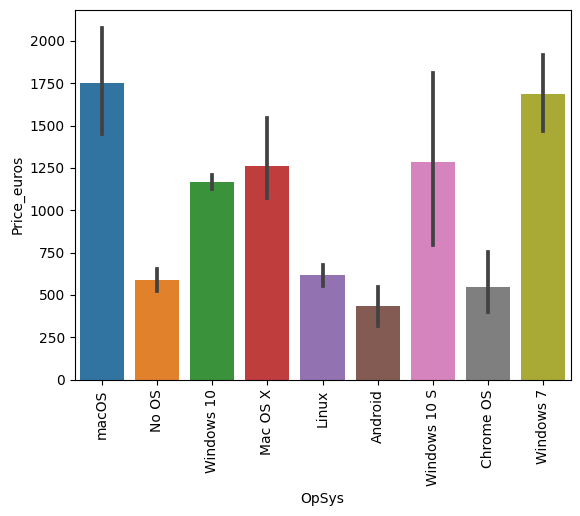

In [92]:
sns.barplot(df['OpSys'],df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [93]:
## after seeing the categories of Opsys we can make 3 categories out of them
def opsys_groups(x):
    if x =='Windows 10' or x=='Windows 7' or x=='Windows 10 s':
        return 'Windows'
    elif x=='macos' or x=='Mac OS x':
        return 'Mac'
    else:
        return 'others/linux/android'

In [94]:
df['OpSys']=df['OpSys'].apply(opsys_groups)

In [95]:
df.head(40)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,MacBook Pro,Ultrabook,8.0,Intel,others/linux/android,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8.0,Intel,others/linux/android,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8.0,Intel,others/linux/android,1.86,575.00,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16.0,AMD,others/linux/android,1.83,2537.45,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8.0,Intel,others/linux/android,1.37,1803.60,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0
5,Acer,Aspire 3,Notebook,4.0,AMD,Windows,2.10,400.00,0,0,100.454670,AMD Processor,0,0,1,0,0,0,0,0,0,0
6,Apple,MacBook Pro,Ultrabook,16.0,Intel,others/linux/android,2.04,2139.97,0,1,220.534624,Intel Core i7,0,0,0,0,0,0,0,0,0,0
7,Apple,Macbook Air,Ultrabook,8.0,Intel,others/linux/android,1.34,1158.70,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
8,Asus,ZenBook UX430UN,Ultrabook,16.0,Nvidia,Windows,1.30,1495.00,0,0,157.350512,Intel Core i7,0,0,0,1,0,0,0,0,0,0
9,Acer,Swift 3,Ultrabook,8.0,Intel,Windows,1.60,770.00,0,1,157.350512,Intel Core i5,1,0,0,0,0,0,0,0,0,0


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


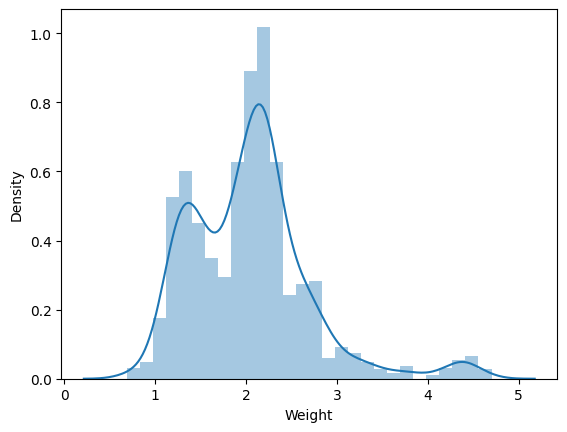

In [96]:
#lets check the weight column now
sns.distplot(df['Weight'])
plt.show()

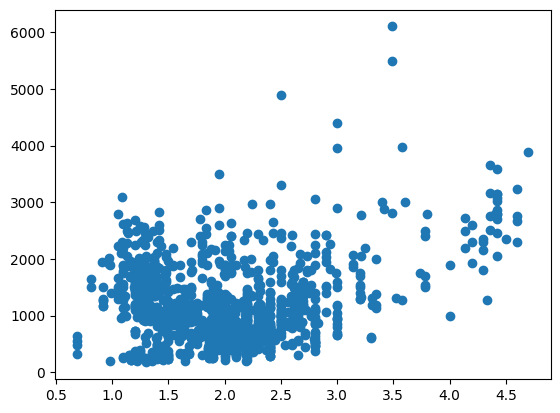

In [97]:
plt.scatter(df['Weight'],df['Price_euros'])
plt.show()

In [98]:
##very weak linear relation between weight and price

In [99]:
df.corr()['Price_euros']

Ram                     0.742905
Weight                  0.209867
Price_euros             1.000000
Touchscreen             0.192917
Ips                     0.253320
ppi                     0.475368
256GB SSD               0.102554
1TB HDD                -0.292645
500GB HDD              -0.238436
512GB SSD               0.332802
128GB SSD +  1TB HDD    0.056988
128GB SSD              -0.148295
256GB SSD +  1TB HDD    0.255301
32GB Flash Storage     -0.201755
2TB HDD                -0.075863
64GB Flash Storage     -0.106333
Name: Price_euros, dtype: float64

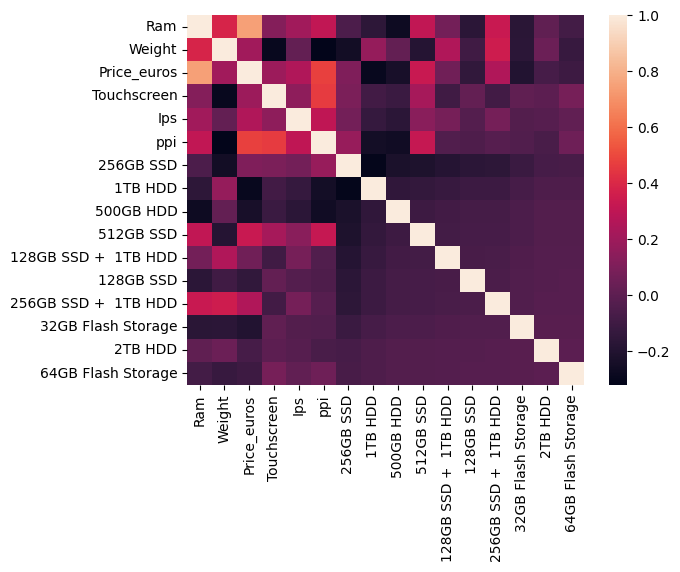

In [100]:
sns.heatmap(df.corr())
plt.show()

In [101]:
### product column
df['Product'].value_counts().to_dict()

{'XPS 13': 30,
 'Inspiron 3567': 29,
 '250 G6': 21,
 'Legion Y520-15IKBN': 19,
 'Vostro 3568': 19,
 'Inspiron 5570': 18,
 'ProBook 450': 18,
 'Alienware 17': 15,
 'Inspiron 5567': 14,
 'Satellite Pro': 13,
 'EliteBook 840': 12,
 'Latitude 5580': 12,
 'ThinkPad X1': 12,
 'Aspire 3': 12,
 'Inspiron 7567': 10,
 'EliteBook 850': 10,
 'MacBook Pro': 10,
 'EliteBook 820': 9,
 'Inspiron 3552': 9,
 'XPS 15': 9,
 'ProBook 470': 8,
 'IdeaPad 320-15ISK': 8,
 'IdeaPad Y700-15ISK': 8,
 'ThinkPad Yoga': 8,
 'Inspiron 5770': 8,
 'IdeaPad 320-15IKBN': 8,
 'Latitude 5480': 8,
 'Vostro 5568': 8,
 'ProBook 430': 7,
 'IdeaPad 320-17IKB': 7,
 'Aspire 5': 7,
 'Probook 440': 7,
 'ProBook 440': 6,
 'ThinkPad 13': 6,
 'ProBook 650': 6,
 'IdeaPad 320-15IAP': 6,
 'Surface Laptop': 6,
 'Notebook 9': 6,
 'IdeaPad 320-15AST': 6,
 'Rog Strix': 6,
 'MacBook 12"': 6,
 'Inspiron 3576': 6,
 'Inspiron 7577': 6,
 'Inspiron 5379': 5,
 'ThinkPad T470s': 5,
 'Precision 3520': 5,
 'Spectre Pro': 5,
 'EliteBook x360': 5,
 'Spe

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


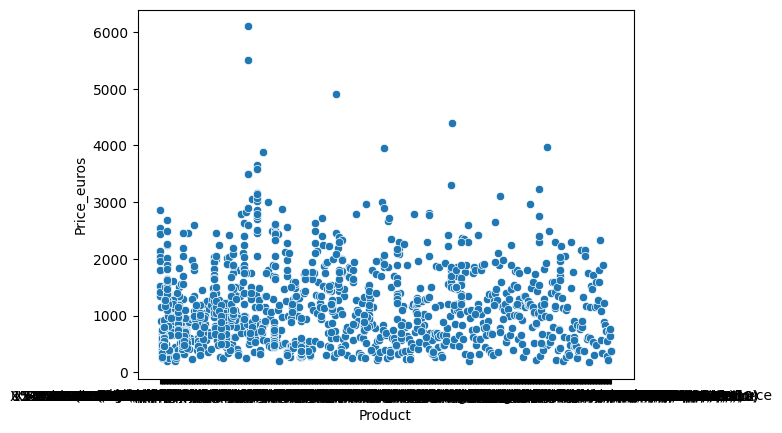

In [102]:
sns.scatterplot(df['Product'],df['Price_euros'])
plt.show()

In [103]:
##cant see any drastic correlation but still it has a lot of information so we will not drop it ..but use count or frequency emncoding
##to change into numerical values
#product_map=df['Product'].value_counts().to_dict()

In [104]:
#df['Product']=df['Product'].map(product_map)

In [105]:
df.head(10)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,MacBook Pro,Ultrabook,8.0,Intel,others/linux/android,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8.0,Intel,others/linux/android,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8.0,Intel,others/linux/android,1.86,575.00,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16.0,AMD,others/linux/android,1.83,2537.45,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8.0,Intel,others/linux/android,1.37,1803.60,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0
5,Acer,Aspire 3,Notebook,4.0,AMD,Windows,2.10,400.00,0,0,100.454670,AMD Processor,0,0,1,0,0,0,0,0,0,0
6,Apple,MacBook Pro,Ultrabook,16.0,Intel,others/linux/android,2.04,2139.97,0,1,220.534624,Intel Core i7,0,0,0,0,0,0,0,0,0,0
7,Apple,Macbook Air,Ultrabook,8.0,Intel,others/linux/android,1.34,1158.70,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
8,Asus,ZenBook UX430UN,Ultrabook,16.0,Nvidia,Windows,1.30,1495.00,0,0,157.350512,Intel Core i7,0,0,0,1,0,0,0,0,0,0
9,Acer,Swift 3,Ultrabook,8.0,Intel,Windows,1.60,770.00,0,1,157.350512,Intel Core i5,1,0,0,0,0,0,0,0,0,0


In [106]:
df.corr()['Price_euros'] ## but not getting a good correlation with target variable after using count or frequency encoding 

Ram                     0.742905
Weight                  0.209867
Price_euros             1.000000
Touchscreen             0.192917
Ips                     0.253320
ppi                     0.475368
256GB SSD               0.102554
1TB HDD                -0.292645
500GB HDD              -0.238436
512GB SSD               0.332802
128GB SSD +  1TB HDD    0.056988
128GB SSD              -0.148295
256GB SSD +  1TB HDD    0.255301
32GB Flash Storage     -0.201755
2TB HDD                -0.075863
64GB Flash Storage     -0.106333
Name: Price_euros, dtype: float64

In [107]:
##lets try label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [108]:
df['Product']=le.fit_transform(df['Product'])

In [109]:
df['Product'].unique()

array([299, 300,  50,  58, 607, 429, 238, 297, 208, 575, 542, 290,  51,
       243,   8, 298, 246, 281, 363, 269, 103,  44, 199, 251, 362, 553,
       257, 564,  63, 259, 210, 407, 573, 591, 360, 239,  16, 537, 180,
       561, 549, 219, 499, 600, 427, 523, 141, 428, 241, 162,  69, 132,
       209,  64, 361, 206, 325, 133, 134,  59, 367, 615, 422, 562, 313,
        21,  29, 123, 322, 227, 500, 166, 485, 540, 473, 368, 420, 256,
       571, 421, 177, 370, 102, 244,  65,   7, 503, 139, 122, 454, 410,
       606, 112, 554, 151,  62, 247, 255, 504, 154, 110,   9, 582, 599,
       249, 568,  67,  61, 148, 301,  47, 189, 517, 590, 302, 576, 430,
       493, 263, 212,  85, 316, 510,  71, 291, 351,  60, 383,  22, 211,
       279, 340,  56, 544, 265, 593, 358,  38, 548,  79, 569, 380, 306,
       538, 128, 589,  20, 386, 381, 551, 547,  13, 124, 186, 585, 546,
       530, 471, 213, 229, 408, 489,  97, 138,  40, 529,  68, 352, 201,
       609, 539, 401, 156, 207, 113, 221, 149, 106, 535, 452, 36

In [110]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,299,Ultrabook,8.0,Intel,others/linux/android,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,300,Ultrabook,8.0,Intel,others/linux/android,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,50,Notebook,8.0,Intel,others/linux/android,1.86,575.00,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,299,Ultrabook,16.0,AMD,others/linux/android,1.83,2537.45,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,299,Ultrabook,8.0,Intel,others/linux/android,1.37,1803.60,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0


In [111]:
df.drop('Product',axis=1,inplace=True)

In [112]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,Ultrabook,8.0,Intel,others/linux/android,1.37,1339.69,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Ultrabook,8.0,Intel,others/linux/android,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8.0,Intel,others/linux/android,1.86,575.00,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16.0,AMD,others/linux/android,1.83,2537.45,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8.0,Intel,others/linux/android,1.37,1803.60,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


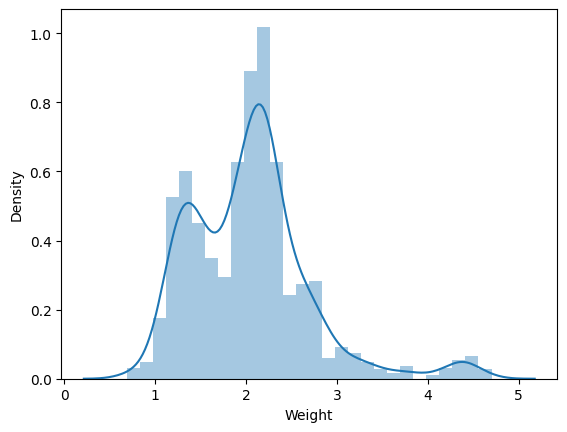

In [113]:
sns.distplot(df['Weight'])
plt.show()### this data is skewed so we need to apply log transformation on the target column

In [114]:
df['Price_euros']=np.log(df['Price_euros'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


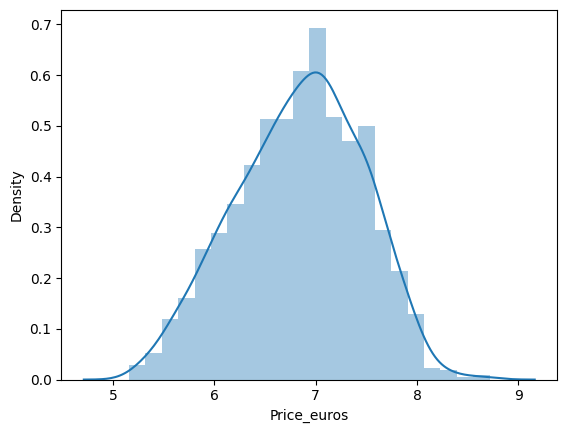

In [115]:
sns.distplot(df['Price_euros'])
plt.show()

In [116]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,Apple,Ultrabook,8.0,Intel,others/linux/android,1.37,7.200194,0,1,226.983005,Intel Core i5,0,0,0,0,0,1,0,0,0,0
1,Apple,Ultrabook,8.0,Intel,others/linux/android,1.34,6.801216,0,0,127.677940,Intel Core i5,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8.0,Intel,others/linux/android,1.86,6.354370,0,0,141.211998,Intel Core i5,1,0,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16.0,AMD,others/linux/android,1.83,7.838915,0,1,220.534624,Intel Core i7,0,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8.0,Intel,others/linux/android,1.37,7.497540,0,1,226.983005,Intel Core i5,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4.0,Intel,Windows,1.80,6.458338,1,1,157.350512,Intel Core i7,0,0,0,0,0,1,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16.0,Intel,Windows,1.30,7.312553,1,1,276.053530,Intel Core i7,0,0,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,2.0,Intel,Windows,1.50,5.433722,0,0,111.935204,Other Intel Processor,0,0,0,0,0,0,0,0,0,1
1301,HP,Notebook,6.0,AMD,Windows,2.19,6.638568,0,0,100.454670,Intel Core i7,0,1,0,0,0,0,0,0,0,0


### using label encoder to transform all categorial features to numerical 


In [118]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Company', 'TypeName', 'Gpu', 'OpSys', 'Cpu_brand_name']

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
for feature in categorical_features:
    df[feature]=le.fit_transform(df[feature])

In [123]:
df.head(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,1,4,8.0,1,1,1.37,7.200194,0,1,226.983005,2,0,0,0,0,0,1,0,0,0,0
1,1,4,8.0,1,1,1.34,6.801216,0,0,127.677940,2,0,0,0,0,0,0,0,0,0,0
2,7,3,8.0,1,1,1.86,6.354370,0,0,141.211998,2,1,0,0,0,0,0,0,0,0,0
3,1,4,16.0,0,1,1.83,7.838915,0,1,220.534624,3,0,0,0,1,0,0,0,0,0,0
4,1,4,8.0,1,1,1.37,7.497540,0,1,226.983005,2,1,0,0,0,0,0,0,0,0,0
5,0,3,4.0,0,0,2.10,5.991465,0,0,100.454670,0,0,0,1,0,0,0,0,0,0,0
6,1,4,16.0,1,1,2.04,7.668547,0,1,220.534624,3,0,0,0,0,0,0,0,0,0,0
7,1,4,8.0,1,1,1.34,7.055054,0,0,127.677940,2,0,0,0,0,0,0,0,0,0,0
8,2,4,16.0,2,0,1.30,7.309881,0,0,157.350512,3,0,0,0,1,0,0,0,0,0,0
9,0,4,8.0,1,0,1.60,6.646391,0,1,157.350512,2,1,0,0,0,0,0,0,0,0,0


### feature scaling- it wil bring all the features to same scale or unit

In [126]:
to_be_scaled=df.drop('Price_euros',axis=1)
to_be_scaled

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,1,4,8.0,1,1,1.37,0,1,226.983005,2,0,0,0,0,0,1,0,0,0,0
1,1,4,8.0,1,1,1.34,0,0,127.677940,2,0,0,0,0,0,0,0,0,0,0
2,7,3,8.0,1,1,1.86,0,0,141.211998,2,1,0,0,0,0,0,0,0,0,0
3,1,4,16.0,0,1,1.83,0,1,220.534624,3,0,0,0,1,0,0,0,0,0,0
4,1,4,8.0,1,1,1.37,0,1,226.983005,2,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4.0,1,0,1.80,1,1,157.350512,3,0,0,0,0,0,1,0,0,0,0
1299,10,0,16.0,1,0,1.30,1,1,276.053530,3,0,0,0,1,0,0,0,0,0,0
1300,10,3,2.0,1,0,1.50,0,0,111.935204,4,0,0,0,0,0,0,0,0,0,1
1301,7,3,6.0,0,0,2.19,0,0,100.454670,3,0,1,0,0,0,0,0,0,0,0


In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(to_be_scaled)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [130]:
scaled_data=pd.DataFrame(scaler.transform(to_be_scaled),columns=to_be_scaled.columns)
scaled_data

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,0.055556,0.8,0.096774,0.5,1.0,0.169576,0.0,1.0,0.520844,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.055556,0.8,0.096774,0.5,1.0,0.162095,0.0,0.0,0.141646,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.388889,0.6,0.096774,0.5,1.0,0.291771,0.0,0.0,0.193326,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.055556,0.8,0.225806,0.0,1.0,0.284289,0.0,1.0,0.496221,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.055556,0.8,0.096774,0.5,1.0,0.169576,0.0,1.0,0.520844,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.555556,0.0,0.032258,0.5,0.0,0.276808,1.0,1.0,0.254951,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1298,0.555556,0.0,0.225806,0.5,0.0,0.152120,1.0,1.0,0.708221,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1299,0.555556,0.6,0.000000,0.5,0.0,0.201995,0.0,0.0,0.081532,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1300,0.388889,0.6,0.064516,0.0,0.0,0.374065,0.0,0.0,0.037694,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
data=pd.concat([df['Price_euros'],scaled_data],axis=1)
data

,Price_euros,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,7.200194,0.055556,0.8,0.096774,0.5,1.0,0.169576,0.0,1.0,0.520844,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6.801216,0.055556,0.8,0.096774,0.5,1.0,0.162095,0.0,0.0,0.141646,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.354370,0.388889,0.6,0.096774,0.5,1.0,0.291771,0.0,0.0,0.193326,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.838915,0.055556,0.8,0.225806,0.0,1.0,0.284289,0.0,1.0,0.496221,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.497540,0.055556,0.8,0.096774,0.5,1.0,0.169576,0.0,1.0,0.520844,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,6.458338,0.555556,0.0,0.225806,0.5,0.0,0.152120,1.0,1.0,0.708221,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1299,7.312553,0.555556,0.6,0.000000,0.5,0.0,0.201995,0.0,0.0,0.081532,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1300,5.433722,0.388889,0.6,0.064516,0.0,0.0,0.374065,0.0,0.0,0.037694,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,6.638568,0.111111,0.6,0.032258,0.5,0.0,0.376559,0.0,0.0,0.037694,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
data.to_csv('laptop_data_train.csv')##data is saved to a csv file now

In [136]:
y=data['Price_euros']
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1303, dtype: float64

In [137]:
x=data.drop(['Price_euros'],axis=1)
x

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
0,0.055556,0.8,0.096774,0.5,1.0,0.169576,0.0,1.0,0.520844,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.055556,0.8,0.096774,0.5,1.0,0.162095,0.0,0.0,0.141646,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.388889,0.6,0.096774,0.5,1.0,0.291771,0.0,0.0,0.193326,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.055556,0.8,0.225806,0.0,1.0,0.284289,0.0,1.0,0.496221,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.055556,0.8,0.096774,0.5,1.0,0.169576,0.0,1.0,0.520844,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.555556,0.0,0.225806,0.5,0.0,0.152120,1.0,1.0,0.708221,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1299,0.555556,0.6,0.000000,0.5,0.0,0.201995,0.0,0.0,0.081532,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1300,0.388889,0.6,0.064516,0.0,0.0,0.374065,0.0,0.0,0.037694,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,0.111111,0.6,0.032258,0.5,0.0,0.376559,0.0,0.0,0.037694,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [140]:
x_train

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
183,0.888889,0.6,0.096774,0.5,0.0,0.326683,0.0,0.0,0.037694,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
699,0.388889,0.6,0.032258,0.0,0.0,0.351621,0.0,1.0,0.193326,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.555556,0.8,0.096774,0.0,0.0,0.264339,0.0,1.0,0.254951,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.000000,0.6,0.032258,0.5,0.0,0.426434,0.0,0.0,0.037694,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.555556,0.0,0.096774,0.5,0.0,0.177057,1.0,1.0,0.259274,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.000000,0.6,0.032258,1.0,0.0,0.376559,0.0,0.0,0.037694,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.111111,0.8,0.225806,1.0,0.0,0.234414,0.0,0.0,0.193326,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.000000,0.6,0.096774,0.0,0.0,0.376559,0.0,0.0,0.037694,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.555556,0.6,0.096774,1.0,1.0,0.376559,0.0,0.0,0.037694,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
x_test

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand_name,256GB SSD,1TB HDD,500GB HDD,512GB SSD,128GB SSD + 1TB HDD,128GB SSD,256GB SSD + 1TB HDD,32GB Flash Storage,2TB HDD,64GB Flash Storage
248,0.388889,0.6,0.032258,0.5,0.0,0.199501,0.0,1.0,0.286575,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,0.666667,0.6,0.032258,0.5,0.0,0.164589,0.0,1.0,0.286575,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693,0.555556,0.0,0.096774,0.5,0.0,0.182045,1.0,0.0,0.455233,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,0.222222,1.0,0.096774,0.0,0.0,0.384040,0.0,0.0,0.193326,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.111111,0.2,0.225806,1.0,0.0,0.900249,0.0,1.0,0.140339,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.111111,0.0,0.032258,0.5,1.0,0.127182,1.0,0.0,0.327053,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172,0.555556,0.6,0.032258,0.0,1.0,0.376559,0.0,0.0,0.037694,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0.111111,0.6,0.096774,0.5,0.0,0.326683,0.0,0.0,0.254951,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.222222,0.0,0.032258,0.5,0.0,0.346633,1.0,1.0,0.193326,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
